Задание 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Количество пропусков:
survived         0
pclass           0
sex          

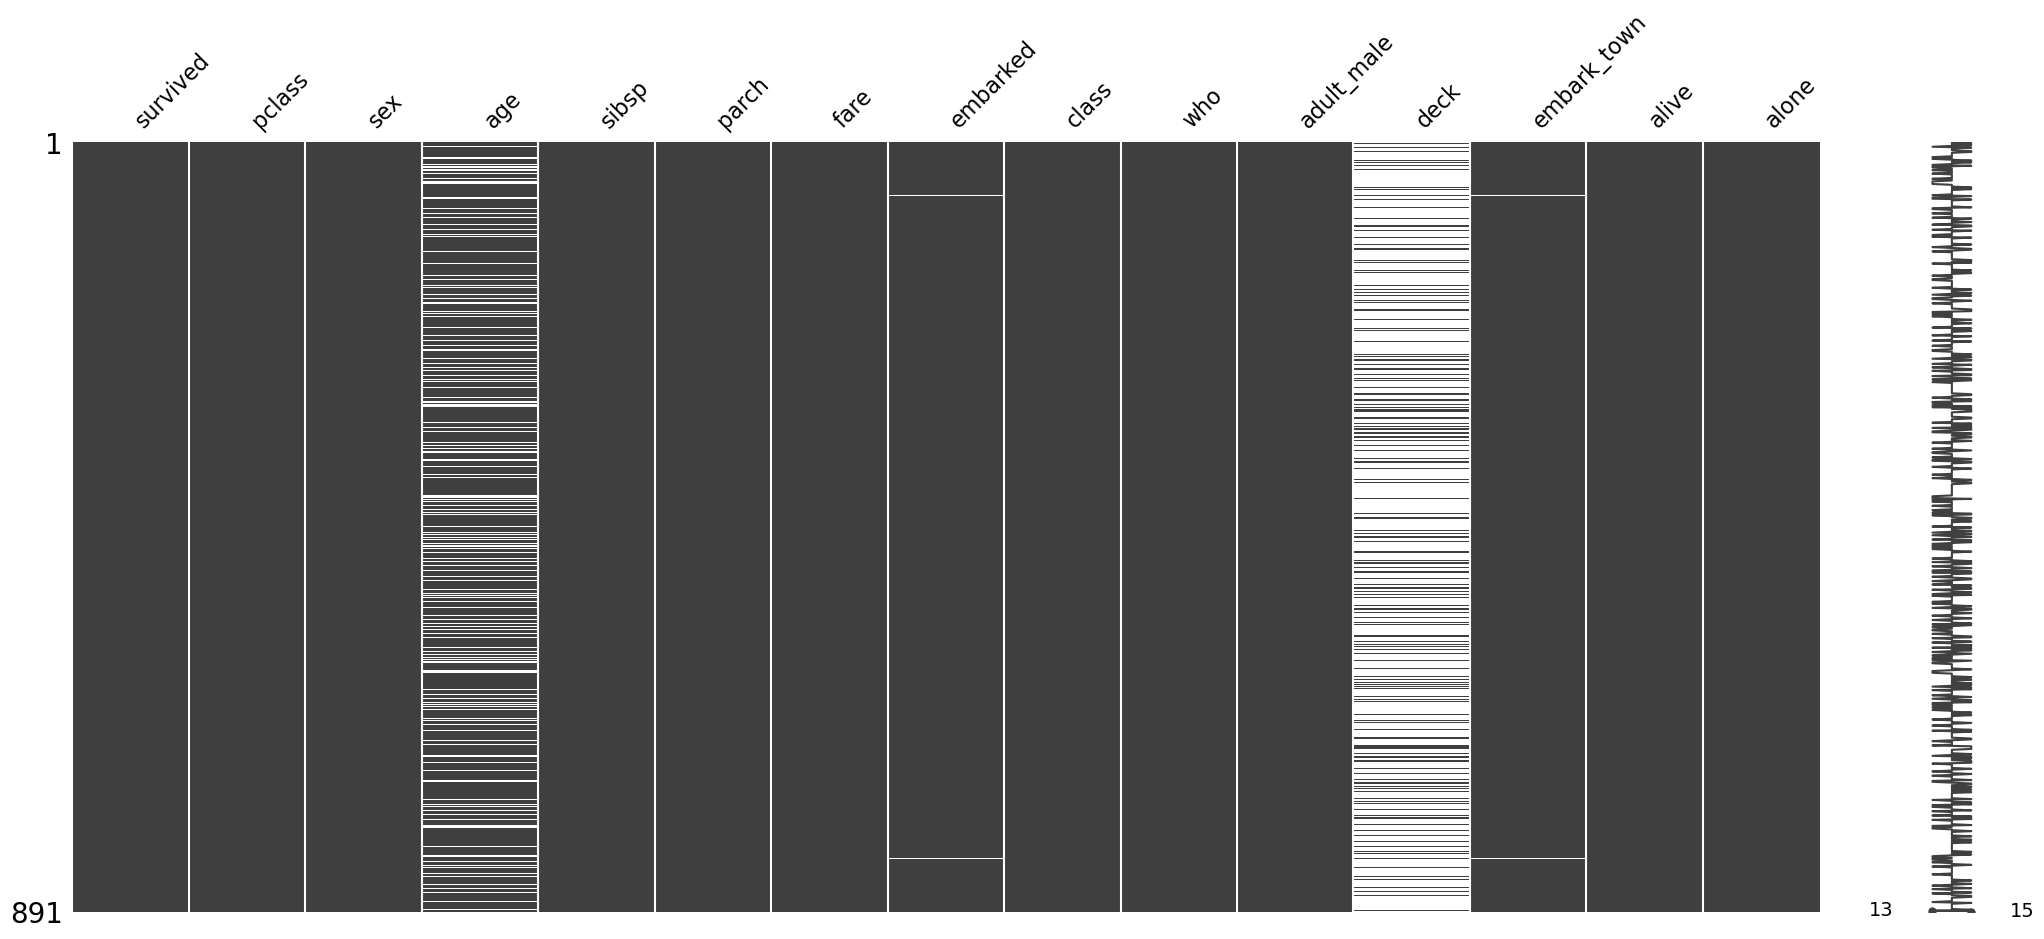


Информация о таблице после обработки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB
None

Количество пропусков после обработки:
survived       0
pclass         0
sex  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

df = sns.load_dataset('titanic')

print(df.info())
print("\nКоличество пропусков:")
print(df.isna().sum())

msno.matrix(df)
plt.show()

mean_age = df['age'].mean()
df['age'] = df['age'].fillna(mean_age)

most_common_embarked = df['embarked'].mode()[0]
df['embarked'] = df['embarked'].fillna(most_common_embarked)

df.drop(columns=['deck'], inplace=True)

print("\nИнформация о таблице после обработки:")
print(df.info())
print("\nКоличество пропусков после обработки:")
print(df.isna().sum())



Задание 2

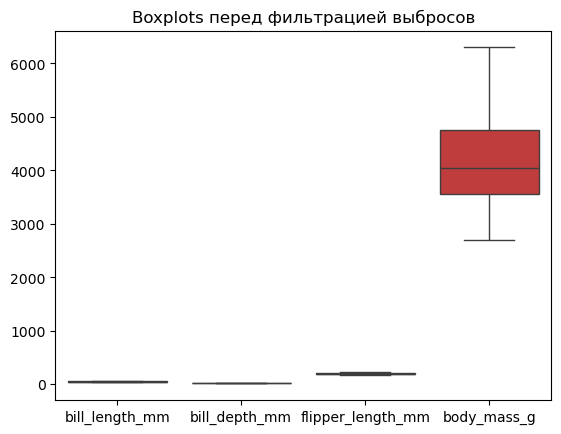

Размер датасета до фильтрации: 344
Размер датасета после фильтрации: 344


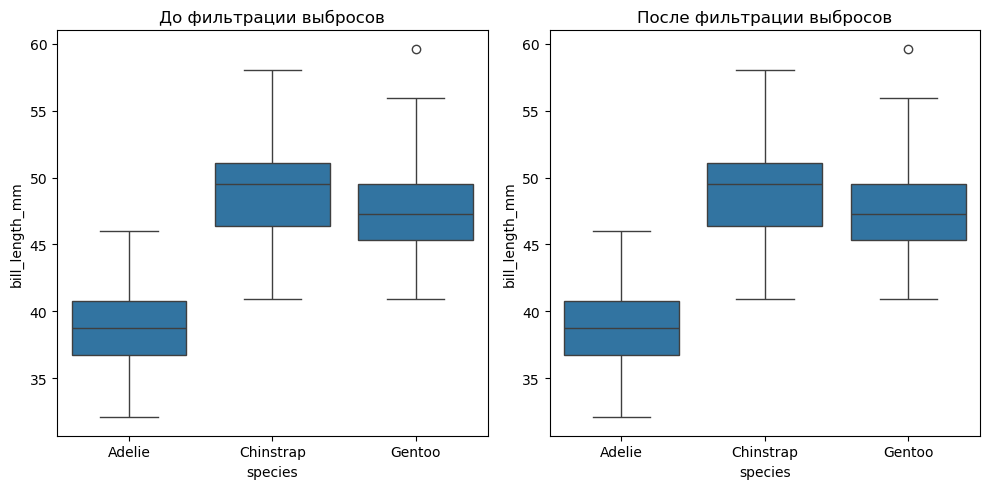

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Шаг 1: Загрузка датасета
df = sns.load_dataset("penguins")

# Шаг 2: Изначальные boxplot-диаграммы
sns.boxplot(data=df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]])
plt.title("Boxplots перед фильтрацией выбросов")
plt.show()

# Шаг 3: Функция удаления выбросов методом IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df >= lower_bound) & (df <= upper_bound)]

# Фильтрация датасета
filtered_df = remove_outliers(df.select_dtypes(include=['float64']))
filtered_df = filtered_df.join(df.drop(columns=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]))

# Шаг 4: Сравниваем количество наблюдений до и после фильтрации
print(f"Размер датасета до фильтрации: {len(df)}")
print(f"Размер датасета после фильтрации: {len(filtered_df)}")

# Шаг 5: Графики до и после фильтрации
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# Boxplot до фильтрации
sns.boxplot(x="species", y="bill_length_mm", data=df, ax=axes[0])
axes[0].set_title("До фильтрации выбросов")

# Boxplot после фильтрации
sns.boxplot(x="species", y="bill_length_mm", data=filtered_df, ax=axes[1])
axes[1].set_title("После фильтрации выбросов")

plt.tight_layout()
plt.show()

Задание 3

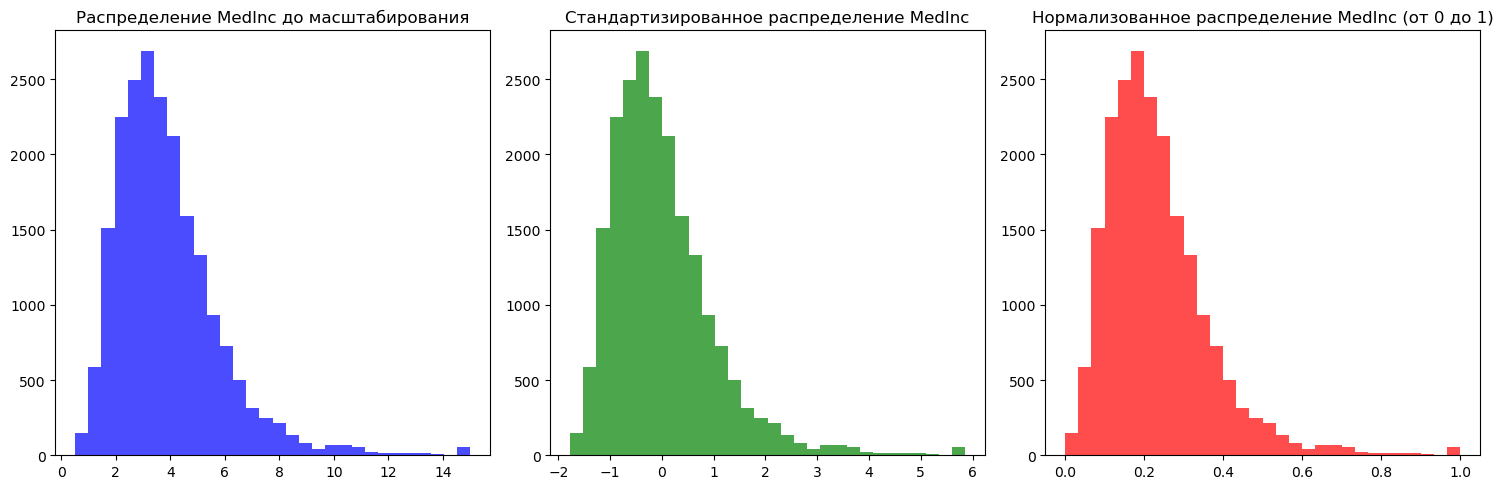

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

# Шаг 1: Загрузка данных
data = fetch_california_housing(as_frame=True)
df = data.frame

# Выделим признак MedInc
medinc_data = df['MedInc']

# Шаг 2: Стандартизация с использованием StandardScaler
scaler_std = StandardScaler()
std_scaled_medinc = scaler_std.fit_transform(medinc_data.values.reshape(-1, 1)).flatten()

# Шаг 3: Нормализация в диапазон [0, 1] с использованием MinMaxScaler
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
minmax_scaled_medinc = scaler_minmax.fit_transform(medinc_data.values.reshape(-1, 1)).flatten()

# Шаг 4: Постройка гистограмм
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Гистограмма до масштабирования
axes[0].hist(medinc_data, bins=30, color='blue', alpha=0.7)
axes[0].set_title('Распределение MedInc до масштабирования')

# Гистограмма после стандартной нормализации (StandardScaler)
axes[1].hist(std_scaled_medinc, bins=30, color='green', alpha=0.7)
axes[1].set_title('Стандартизированное распределение MedInc')

# Гистограмма после нормализации в диапазоне [0, 1]
axes[2].hist(minmax_scaled_medinc, bins=30, color='red', alpha=0.7)
axes[2].set_title('Нормализованное распределение MedInc (от 0 до 1)')

plt.tight_layout()
plt.show()

Задание 4

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Загрузка датасета
data = fetch_openml(name='adult', version=2, as_frame=True)
df = data.frame

# Приведение категорий к единому виду (убираем лишние пробелы)
df['education'] = df['education'].str.strip()

# Выбор необходимых колонок
selected_columns = ['education', 'marital-status', 'occupation', 'class']
df_selected = df[selected_columns].copy()  # Создаем копию для безопасности

# Label encoding для упорядоченной переменной 'education'
ordered_levels = [
    'Preschool',
    '1st-4th',
    '5th-6th',
    '7th-8th',
    '9th',
    '10th',
    '11th',
    '12th',
    'HS-grad',
    'Some-college',
    'Assoc-voc',
    'Assoc-acdm',
    'Bachelors',
    'Masters',
    'Prof-school',
    'Doctorate'
]

le = LabelEncoder().fit(ordered_levels)
df_selected['education_encoded'] = le.transform(df_selected['education'])

# Удаление старого столбца 'education'
df_selected.drop('education', axis=1, inplace=True)

# One-hot encoding для 'marital-status' и 'occupation' с исключением первой категории
df_encoded = pd.get_dummies(df_selected, columns=['marital-status', 'occupation'], drop_first=True)

# Размерности до и после кодирования
print(f'Исходная размерность таблицы: {df_selected.shape}')
print(f'Размерность после кодирования: {df_encoded.shape}')

Исходная размерность таблицы: (48842, 4)
Размерность после кодирования: (48842, 21)


Задание 5

In [6]:
# First, we need to make sure we have the dataset
# Option 1: Download the dataset if it's publicly available
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import os

# Check if the file exists in the current directory, if not, try to download it
file_path = 'heart.csv'
if not os.path.exists(file_path):
    try:
        # Try to download from a common source (adjust URL as needed)
        print("Downloading heart.csv dataset...")
        url = "https://raw.githubusercontent.com/datasets/heart-disease/master/data/heart.csv"
        df = pd.read_csv(url)
        # Optionally save it locally
        df.to_csv(file_path, index=False)
        print(f"Dataset saved to {file_path}")
    except Exception as e:
        print(f"Error downloading dataset: {e}")
        print("Please manually download the heart.csv file and place it in the current directory")
        # Create a small sample dataset for demonstration
        print("Creating a sample dataset for demonstration...")
        data = {
            'age': [52, 53, 70, 61, 62],
            'sex': ['M', 'F', 'M', 'M', 'F'],
            'chestpain': ['typical', 'atypical', 'asymptomatic', 'typical', 'atypical'],
            'restingbp': [125, 140, 145, 130, 135],
            'cholesterol': [212, 203, 174, 221, 240],
            'restecg': ['normal', 'abnormal', 'normal', 'normal', 'abnormal'],
            'maxhr': [168, 155, 125, 144, 142],
            'exerciseangina': ['Y', 'N', 'Y', 'N', 'Y']
        }
        df = pd.DataFrame(data)
else:
    # Read the file if it exists
    df = pd.read_csv(file_path)

# Now continue with the rest of the code
# Обработка пропущенных значений
# Проверка наличия пропусков
print("\nКоличество пропусков в каждом столбце:")
print(df.isnull().sum())

# Поскольку пропусков нет, дополнительная обработка пропусков не требуется

# Этап 3: Обнаружение и удаление выбросов
# Определение функции для вычисления Z-балла и выявления выбросов
def detect_outliers_zscore(data, threshold=3):
    """ Функция обнаружения выбросов методом Z-балла.
        :param data: Series или массив данных
        :param threshold: порог отклонения (обычно используют 3)
        :return: булевый массив, где True соответствует значению-выбросу
    """
    z_scores = np.abs(zscore(data))
    return z_scores > threshold

# Поиск и удаление выбросов по указанным признакам
for column in ["age", "cholesterol", "restingbp", "maxhr"]:
    outliers = detect_outliers_zscore(df[column])
    df = df[~outliers]

# Этап 4: Масштабирование числовых признаков
num_cols = ["age", "cholesterol", "restingbp", "maxhr"]
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[num_cols])
df_scaled = df.copy()
df_scaled[num_cols] = scaled_values

# Этап 5: Кодирование категориальных признаков
cat_cols = ["sex", "chestpain", "exerciseangina", "restecg"]

# Проверка типов данных
for col in cat_cols:
    df_scaled[col] = df_scaled[col].astype(str)

# One-Hot Encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df_scaled[cat_cols])

# Получим новые осмысленные имена столбцов
new_column_names = []
for i, feature in enumerate(encoder.categories_):
    category = feature[0]
    for value in feature[1:]:
        new_column_names.append(f'{cat_cols[i]}_{value}')

encoded_df = pd.DataFrame(encoded_features, columns=new_column_names, index=df.index)

# Объединение закодированных признаков с основным набором данных
final_df = pd.concat([df_scaled.drop(columns=cat_cols), encoded_df], axis=1)

# Итоговая структура данных
print("\nИтого преобразованный датасет:")
print(final_df.head())

Error downloading dataset: HTTP Error 404: Not Found
Please manually download the heart.csv file and place it in the current directory
Creating a sample dataset for demonstration...

Количество пропусков в каждом столбце:
age               0
sex               0
chestpain         0
restingbp         0
cholesterol       0
restecg           0
maxhr             0
exerciseangina    0
dtype: int64

Итого преобразованный датасет:
        age  restingbp  cholesterol     maxhr  sex_M  chestpain_atypical  \
0 -1.153105  -1.414214     0.091863  1.482264    1.0                 0.0   
1 -1.001380   0.707107    -0.321521  0.573328    0.0                 1.0   
2  1.577933   1.414214    -1.653535 -1.524215    1.0                 0.0   
3  0.212414  -0.707107     0.505247 -0.195771    1.0                 0.0   
4  0.364138   0.000000     1.377946 -0.335607    0.0                 1.0   

   chestpain_typical  exerciseangina_Y  restecg_normal  
0                1.0               1.0             1.0  
1 

Индивидуальное задание
Вариант 3

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import zscore

# Загружаем датасет tips из Seaborn
df = sns.load_dataset('tips')

# Часть 1: Первичный обзор структуры данных
print("Информация о датасете:")
print(df.info())
print("\nСтатистика признаков:")
print(df.describe())

# Часть 2: Анализ пропусков
print("\nКоличество пропусков по столбцам:")
print(df.isna().sum())

# Часть 3: Обнаружение и удаление выбросов методом IQR
# Числовые признаки
num_cols = ['total_bill', 'tip']

# Функция для удаления выбросов
def remove_outliers_IQR(df, cols):
    cleaned_df = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        mask = (cleaned_df[col] < lower_bound) | (cleaned_df[col] > upper_bound)
        cleaned_df = cleaned_df[~mask]
    
    return cleaned_df

# Применяем функцию
df_cleaned = remove_outliers_IQR(df, num_cols)

# Информация о количестве записей до и после очистки
print("\nРазмер датасета до удаления выбросов:", len(df))
print("Размер датасета после удаления выбросов:", len(df_cleaned))

# Часть 4: Масштабирование числовых признаков
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols)
], remainder='passthrough')  # Остальные столбцы оставляем без изменения

# Применяем масштабирование
scaled_data = preprocessor.fit_transform(df_cleaned)

# Правильно создаем DataFrame после масштабирования
# Сохраняем порядок столбцов
all_columns = num_cols + list(set(df_cleaned.columns) - set(num_cols))
df_preprocessed = pd.DataFrame(scaled_data, columns=all_columns)

# Часть 5: Кодирование категориальных признаков
cat_cols = ['sex', 'smoker', 'day', 'time']
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Применяем OHE только к категориальным столбцам
cat_encoded = ohe.fit_transform(df_preprocessed[cat_cols])
cat_encoded_df = pd.DataFrame(cat_encoded, columns=ohe.get_feature_names_out(cat_cols))

# Удаляем исходные категориальные столбцы и добавляем закодированные
df_final = df_preprocessed.drop(columns=cat_cols)
processed_df = pd.concat([df_final, cat_encoded_df], axis=1)

# Показываем первые записи обработанных данных
print("\nПервые строки обработанного датасета:")
print(processed_df.head())

# Резюме проделанной работы
print("\nИтоги работы:")
print("- Выбросы были удалены методом IQR.")
print("- Числовые признаки были стандартизированы.")
print("- Категориальные признаки были закодированы методом One-Hot Encoding.")

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

Статистика признаков:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

Количество пропусков по с